# Image Compression Project

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [52]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = [] 
        for j in range(centroids.shape[0]):
            distance.append(np.linalg.norm(X[i] - centroids[j]))
        idx[i] = np.argmin(distance)
    
    return idx

## Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

In [31]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
    
    return centroids

## K-means on a sample dataset 

Run the K-means algorithm on a 2D dataset.

In [56]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [55]:
def kMeans_init_centroids(X, K):
   
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    
    return centroids

In [57]:
original_img = plt.imread('img.png')

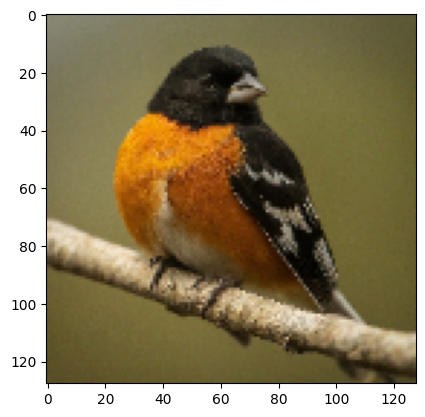

In [58]:
plt.imshow(original_img)

In [59]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 4)


In [60]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))

In [61]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [62]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [14 14 14 14 14]


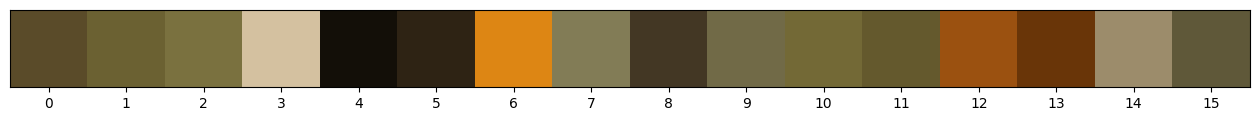

In [68]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)
    
show_centroid_colors(centroids)

In [64]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

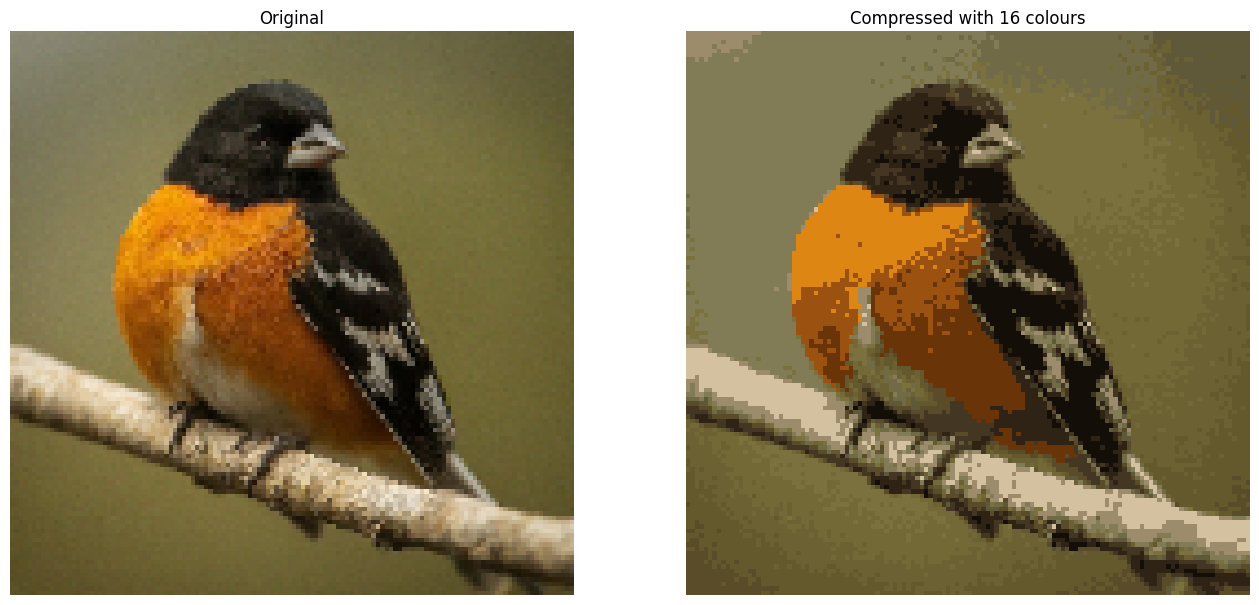

In [65]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()